#### **Importing neccesary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Reading Datasets**

In [3]:
train = pd.read_csv(r'/content/drive/My Drive/Data/train.csv')
test = pd.read_csv(r'/content/drive/My Drive/Data/test.csv')

In [4]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [5]:
print(train.shape)
print(test.shape)

(20800, 5)
(5200, 4)


## **Text Preprocessing**

#### **Missing values**

In [6]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

*   As we can see from the above table, our dataset 
contains null values, but their are only few(~12%) and it is text data so we would not like to apply any feature engineering and spoil our data.
*   Another approach can be tried is that replacing NaN 
values with some arbitrary values (ex:'Missing', 'Not Available') but this technique would spoil our data and can introduce bias towards these arbitrary values.

In [7]:
train = train.dropna()

In [8]:
train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


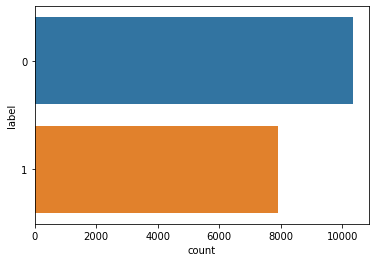

In [9]:
sns.countplot(y= 'label', data = train)

#####**Removing url**

In [10]:
train['title_cleaned']=train['title'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "", x))
train['text_cleaned']=train['text'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "", x))

#####**Removing Email**

In [11]:
train['text_cleaned'] = train['text_cleaned'].apply(lambda x: re.sub(r'''[\w\.-]+@[\w\.-]+''', "", x))
train['title_cleaned'] = train['title_cleaned'].apply(lambda x: re.sub(r'''[\w\.-]+@[\w\.-]+''', "", x))

#####**Removing all special characters**

In [12]:
#train['text_cleaned'] = train['text_cleaned'].apply(lambda x: re.sub(r'''[!"\$%&\'()*+,\-.\’“”/:;=#@?\[\\\]^_`{|}~]*''', "", x))
#train['title_cleaned'] = train['title_cleaned'].apply(lambda x: re.sub(r'''[!"\$%&\'()*+,\-.\’“”/:;=#@?\[\\\]^_`{|}~]*''', "", x))

train['text_cleaned'] = train['text_cleaned'].apply(lambda x: re.sub(r'''[!"\$%&\'()*+,\-.\“”—/:;=#@?\[\\\]^_`{|}~]*''', "", x))
train['title_cleaned'] = train['title_cleaned'].apply(lambda x: re.sub(r'''[!"\$%&\'()*+,\-.\“”—/:;=#@?\[\\\]^_`{|}~]*''', "", x))

In [13]:
def find_number(text):
    line=re.findall(r'[0-9]+',text)
    return " ".join(line)
print(train['text'].apply(lambda x: find_number(x)))

0                            30 2016 28 2016 25 78 2012 30
1                 48 1969 2016 400 1969 2016 48 38 1960 50
2                          29 2016 2003 9 11 19 2003 13 16
3               15 2014 15 28 15 13 15 19 42 45 18 22 2014
4                                                 35 36 19
                               ...                        
20795                                                    1
20796    11 6 3 8 15 49 43 5 4 4 40 5 44 5 5 4 4 35 37 ...
20797    12 11 10 000 880 1 30 21 18 11 1 9 1 5 2014 4 6 5
20798           11 02 2016 13 2016 150 50 680 10 2003 2006
20799    2015 89 3 90 1 96 5 2004 35 31 2016 35 1 400 0...
Name: text, Length: 18285, dtype: object


#### **Removing all numbers**

In [14]:
train['text_cleaned'] = train['text_cleaned'].apply(lambda x: re.sub(r'[0-9]+', "", x))
train['title_cleaned'] = train['title_cleaned'].apply(lambda x: re.sub(r'[0-9]+', "", x))

#### **Getting the Independent feature**

In [15]:
X = train.drop('label', axis=1)
X.head()

,id,title,author,text,title_cleaned,text_cleaned
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide We Didn’t Even See Comey’s Lett...,House Dem Aide We Didn’t Even See Comey’s Lett...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,FLYNN Hillary Clinton Big Woman on Campus Bre...,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Why the Truth Might Get You Fired,Why the Truth Might Get You Fired October \n...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Civilians Killed In Single US Airstrike Have ...,Videos Civilians Killed In Single US Airstrik...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...


#### **Getting the Dependent feature**

In [16]:
y = train['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [17]:
import tensorflow as tf

In [18]:
tf.__version__

'2.3.0'

In [19]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [20]:
### Vocabulary size
voc_size=5000

#### **One hot Representation**

In [21]:
messages=X.copy()

In [22]:
messages.reset_index(inplace=True)

In [23]:
import nltk
import re
from nltk.corpus import stopwords

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title_cleaned'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


Streaming output truncated to the last 5000 lines.
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
1

In [26]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[369, 2831, 1329, 3342, 1611, 2395, 2890, 4002, 3963, 4870],
 [4241, 3496, 1269, 3334, 3777, 4367, 3629],
 [3568, 4657, 3871, 4057],
 [3783, 1982, 4835, 4961, 627, 174],
 [1083, 3777, 1866, 3336, 3771, 1973, 3777, 1716, 1657, 3326],
 [2856,
  1390,
  65,
  802,
  3631,
  4694,
  3295,
  779,
  4573,
  2617,
  380,
  338,
  833,
  1895,
  3629],
 [1061, 3485, 3817, 2585, 811, 1655, 4700, 815, 3224, 4284, 1033],
 [868, 26, 2341, 3042, 2031, 4694, 3574, 3224, 4284, 1033],
 [2857, 3930, 72, 4747, 1119, 1551, 4608, 4694, 4572],
 [289, 812, 3865, 1374, 3059, 1533, 3555, 1601],
 [4934, 3624, 4299, 4770, 268, 3366, 979, 3352, 3416, 2671, 433],
 [4961, 4705, 1611, 4854, 4694, 3042],
 [1018, 384, 2387, 936, 2603, 2579, 3150, 55, 2966],
 [135, 4649, 3159, 1891, 3464, 4171, 936, 3224, 4284, 1033],
 [2552, 2627, 4178, 4180, 824, 3224, 4284, 1033],
 [3795, 1292, 3734, 30, 4399, 4699, 4646, 475, 3723, 501],
 [4798, 2239, 3496],
 [725, 4577, 3697, 3306, 4694, 1839, 1108, 3629],
 [3300, 2682, 1269, 24

####**Embedding Representation**

In [27]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4002 3963 4870]
 [   0    0    0 ... 3777 4367 3629]
 [   0    0    0 ... 4657 3871 4057]
 ...
 [   0    0    0 ... 3224 4284 1033]
 [   0    0    0 ... 3682  554 3758]
 [   0    0    0 ... 3341 1405 3639]]


In [28]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  369,
       2831, 1329, 3342, 1611, 2395, 2890, 4002, 3963, 4870], dtype=int32)

In [29]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


####**Bi-directional LSTM**

In [30]:
## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
len(embedded_docs),y.shape

(18285, (18285,))

In [32]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [33]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=25)

####**Model Training And Accuracy(LSTM)**

In [35]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
200/200 [==============================] - 6s 31ms/step - loss: 0.3411 - accuracy: 0.8412 - val_loss: 0.1943 - val_accuracy: 0.9182
Epoch 2/10
200/200 [==============================] - 6s 30ms/step - loss: 0.1412 - accuracy: 0.9444 - val_loss: 0.1873 - val_accuracy: 0.9233
Epoch 3/10
200/200 [==============================] - 6s 29ms/step - loss: 0.1012 - accuracy: 0.9616 - val_loss: 0.2203 - val_accuracy: 0.9227
Epoch 4/10
200/200 [==============================] - 6s 29ms/step - loss: 0.0728 - accuracy: 0.9748 - val_loss: 0.2272 - val_accuracy: 0.9134
Epoch 5/10
200/200 [==============================] - 6s 29ms/step - loss: 0.0523 - accuracy: 0.9827 - val_loss: 0.2746 - val_accuracy: 0.9118
Epoch 6/10
200/200 [==============================] - 6s 29ms/step - loss: 0.0322 - accuracy: 0.9904 - val_loss: 0.3478 - val_accuracy: 0.9141
Epoch 7/10
200/200 [==============================] - 6s 30ms/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.3785 - val_accuracy: 0.9085

In [36]:
y_pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test,y_pred)

array([[2769,  291],
       [ 206, 2220]])

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9094057601166606

####**Model Training And Accuracy(Bi- directional LSTM)**

In [40]:
y_pred1=model1.predict_classes(X_test)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test,y_pred1)

array([[   7, 3053],
       [  78, 2348]])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.42927451695224206

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.08      0.00      0.00      3060
           1       0.43      0.97      0.60      2426

    accuracy                           0.43      5486
   macro avg       0.26      0.49      0.30      5486
weighted avg       0.24      0.43      0.27      5486

